# Exploratory Data Analysis with Python
[Takato Matsumoto](takato.matsumoto0114@gmail.com) - Jun 2020




## 国勢調査 
所得にどのような要素が影響を与えるのかを分析することを目的としたものです．  
用いるデータセットは１９９４年のアメリカ国勢調査で得られたデータセットです。  
データソース: https://archive.ics.uci.edu/ml/datasets/census+income

In [1]:
#ライブラリの読み込み
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import matplotlib.pyplot as plt
import os.path
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'IPAexGothic'
plt.rcParams['font.size'] = 18
plt.rcParams['figure.figsize'] = (15,10)

In [0]:
#CSVファイルの読み込み，dfという名前のデータフレームにCSVファイルを読み込んでいます
df = pd.read_table("https://raw.githubusercontent.com/TakatoMatsumoto/data_policy_studies/master/chapter_2/input/train.tsv", low_memory=False)

In [4]:
#読み込んだデータのチェック、上から5行のみ表示
df.head()

,id,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Y
0,5,90,Private,313986,11th,7,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,40,United-States,<=50K
1,10,46,Private,74895,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1485,55,United-States,<=50K
2,11,37,Private,67433,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,>50K
3,13,45,Local-gov,144940,Masters,14,Divorced,Prof-specialty,Unmarried,Black,Female,0,0,40,United-States,<=50K
4,14,40,Private,272960,Assoc-acdm,12,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,42,United-States,>50K


In [0]:
#所得の列名が'Y'だと分かりにくいので、'high-income'に変更
#$50K以上の人は1,以下の人は0となるようにした
df = df.rename(columns={'Y': 'high-income'})
df = df.replace({'<=50K': 0, '>50K': 1})

In [6]:
#変わっているか確認
df

,id,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,high-income
0,5,90,Private,313986,11th,7,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,40,United-States,0
1,10,46,Private,74895,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1485,55,United-States,0
2,11,37,Private,67433,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,1
3,13,45,Local-gov,144940,Masters,14,Divorced,Prof-specialty,Unmarried,Black,Female,0,0,40,United-States,0
4,14,40,Private,272960,Assoc-acdm,12,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,42,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,32552,42,Private,83411,Some-college,10,Divorced,Exec-managerial,Not-in-family,White,Male,0,1408,40,United-States,0
16276,32553,59,Self-emp-not-inc,223131,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,60,United-States,0
16277,32554,42,Private,142424,Assoc-voc,11,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,0
16278,32555,19,?,119234,Some-college,10,Never-married,?,Other-relative,White,Female,0,0,15,United-States,0


In [7]:
#データのチェック
#int64と書かれているものは数値型の変数、objectはカテゴリ型変数
#16280 entriesとあるので16280人分のデータが入っている
# 'fnlgwt'はUSにいる、その人と似た特性を持っている人の数
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16280 entries, 0 to 16279
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              16280 non-null  int64 
 1   age             16280 non-null  int64 
 2   workclass       16280 non-null  object
 3   fnlwgt          16280 non-null  int64 
 4   education       16280 non-null  object
 5   education-num   16280 non-null  int64 
 6   marital-status  16280 non-null  object
 7   occupation      16280 non-null  object
 8   relationship    16280 non-null  object
 9   race            16280 non-null  object
 10  sex             16280 non-null  object
 11  capital-gain    16280 non-null  int64 
 12  capital-loss    16280 non-null  int64 
 13  hours-per-week  16280 non-null  int64 
 14  native-country  16280 non-null  object
 15  high-income     16280 non-null  int64 
dtypes: int64(8), object(8)
memory usage: 2.0+ MB


In [0]:
#数値型変数の列名
numeric_features = ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week','high-income']

#カテゴリ型変数(中身が文字列)の列名
categorical_features = ['workclass','education','marital-status', 'occupation', 'relationship', 'race', 'sex', 'native']

In [21]:
df.head()

,id,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,high-income,hours-per-week-bins
0,5,90,Private,313986,11th,7,Single,Handlers-cleaners,Own-child,White,Male,0,0,40,United-States,0,"(20.6, 40.2]"
1,10,46,Private,74895,Assoc-acdm,12,Married,Craft-repair,Husband,White,Male,0,1485,55,United-States,0,"(40.2, 59.8]"
2,11,37,Private,67433,HS-grad,9,Married,Adm-clerical,Wife,White,Female,0,0,40,United-States,1,"(20.6, 40.2]"
3,13,45,Local-gov,144940,Masters,14,Single,Prof-specialty,Unmarried,Black,Female,0,0,40,United-States,0,"(20.6, 40.2]"
4,14,40,Private,272960,Assoc-acdm,12,Married,Tech-support,Husband,White,Male,0,0,42,United-States,1,"(40.2, 59.8]"


# 1. 目的変数の分析


Text(0, 0.5, 'Count')

findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.


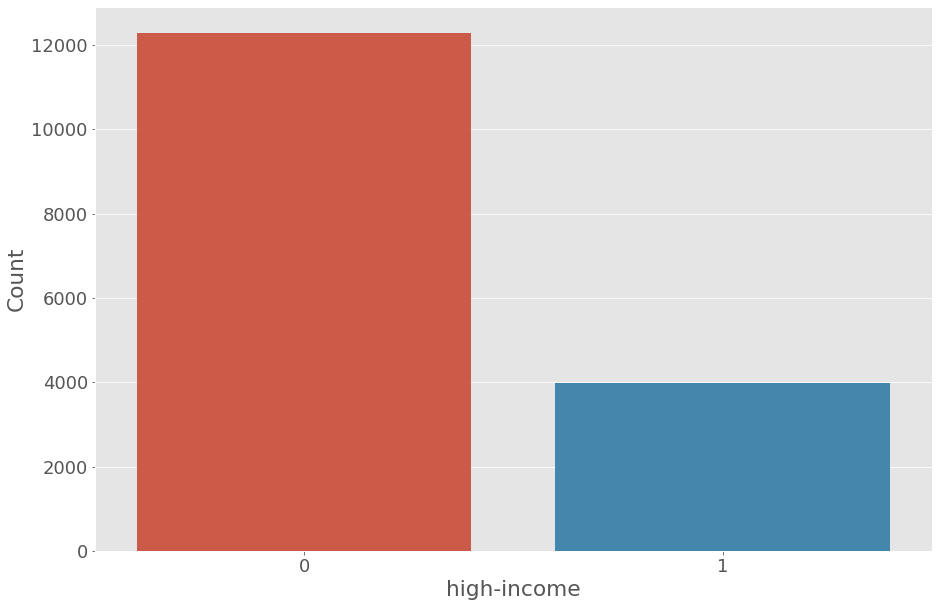

In [9]:
#目的変数の分布
sns.countplot(df['high-income'])
plt.ylabel('Count')

16280人中、約12000人が年間収入＄50K以下、約4000人が年間収入＄50K以上であることが分かります

# 2. 数値型変数の分析


In [10]:
#数値型変数の統計量表示
#中央値を見るとcapital-gain, capital-lossは０となっており、平均値と離れていることが分かります
df[numeric_features].describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,high-income
count,16280.000000,1.628000e+04,16280.000000,16280.000000,16280.000000,16280.000000,16280.000000
mean,38.603808,1.899753e+05,10.089558,1131.057617,88.075369,40.410012,0.245209
std,13.672102,1.048903e+05,2.570911,7672.406043,405.251482,12.311716,0.430224
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.186912e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.789955e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376340e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.226583e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


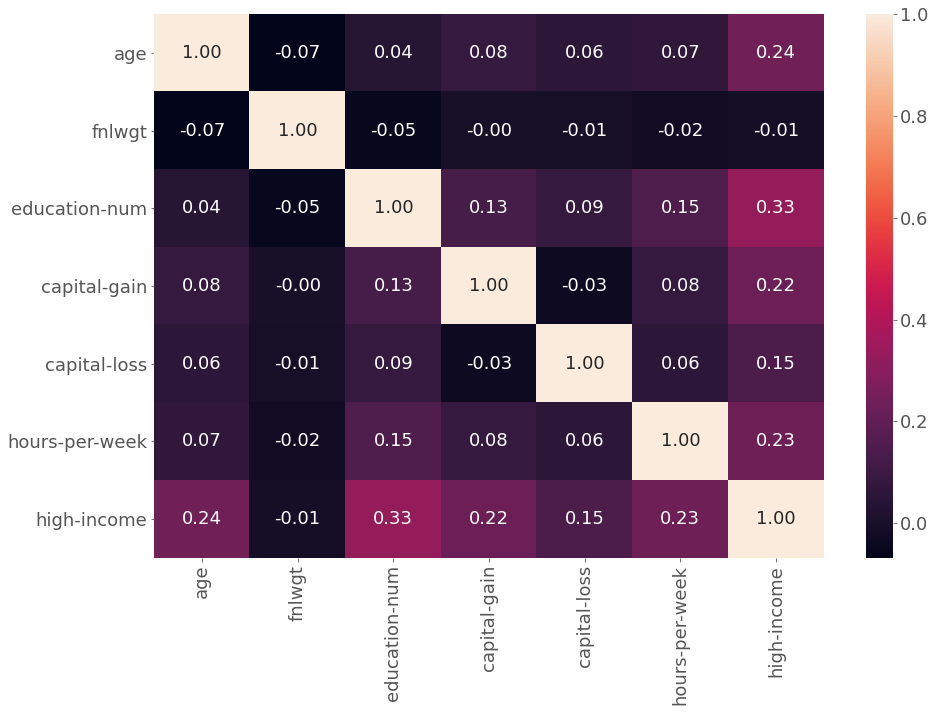

In [11]:
#相関行列の描画
#所得と各数値型変数の相関係数
sns.heatmap(df[numeric_features].corr(), annot=True, fmt = ".2f")

以下の要素は収入との相関係数が0.2-0.3ほどで、弱い相関があります。順に詳細に見ていきましょう。
- 年齢
- 教育年数
- 週の仕事時間  
## 年齢の分析

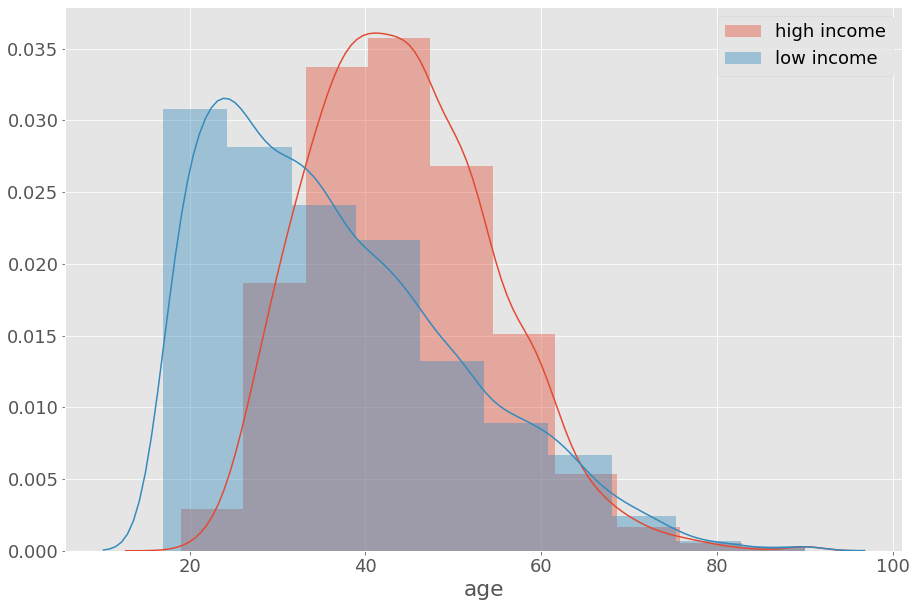

In [12]:
var = 'age'
data_high = df[df['high-income']==1]
sns.distplot(data_high[var], label='high income', bins=10)

data_low = df[df['high-income']==0]
sns.distplot(data_low[var], label='low income', bins=10)
plt.legend()

所得が高いグループはヒストグラムが右によっており、年齢が所得と関係していることが分かります。
## 教育年数の分析

Text(15.439999999999998, 0.5, 'high income probability')

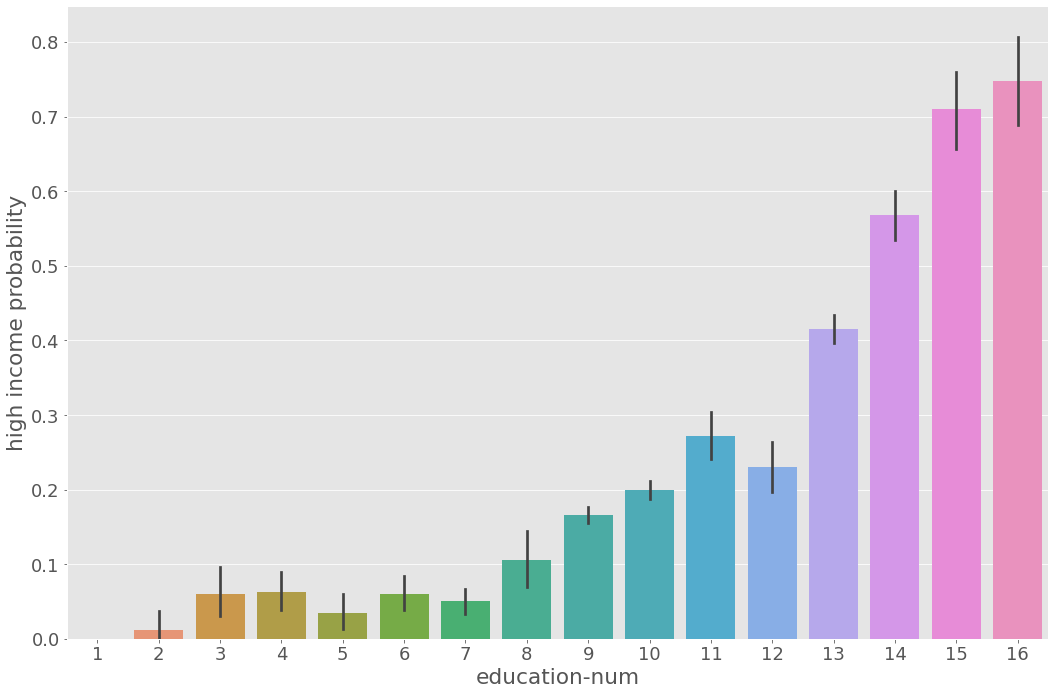

In [13]:
var = 'education-num'
sns.factorplot(x=var, y="high-income", data=df, kind='bar', size=10, aspect=1.5)
plt.ylabel('high income probability')

high-incomeである確率を教育を受けた年数ごとに示したグラフです。
教育を受けた年数は所得に影響を与えていることが分かります。
## 週に働いている時間

Text(15.439999999999998, 0.5, 'high income probability')

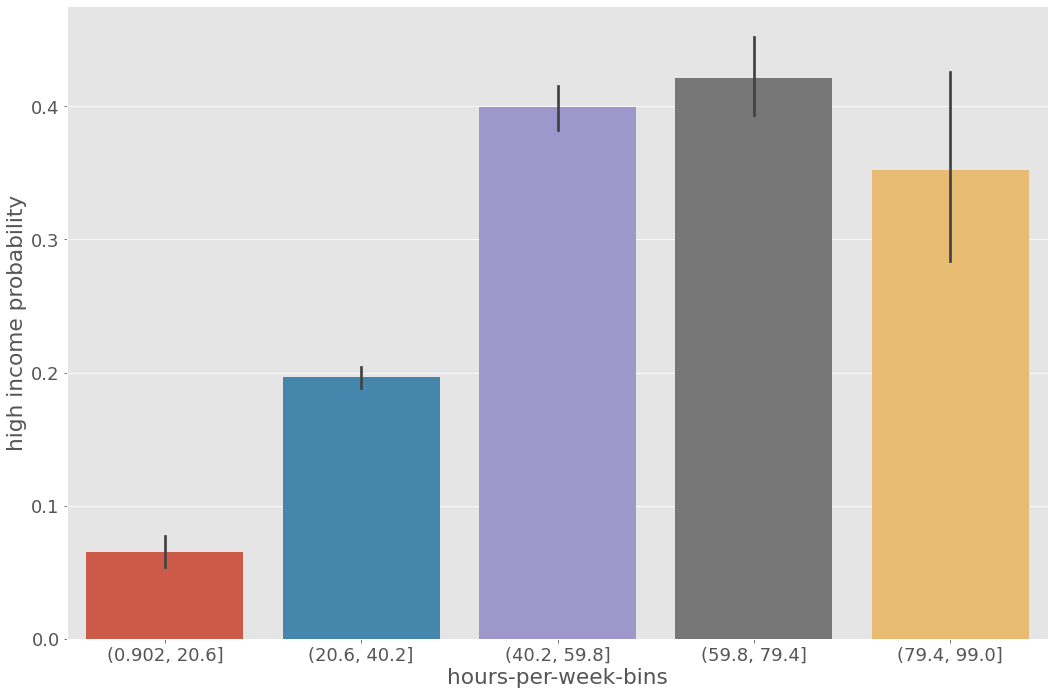

In [19]:
var = 'hours-per-week'
df['hours-per-week-bins'] = pd.cut(df['hours-per-week'], bins=5)
sns.factorplot(x='hours-per-week-bins', y="high-income", data=df, kind='bar', size=10, aspect=1.5)
plt.ylabel('high income probability')

当然の結果ですが、週に働いている時間が多い方が所得が多いことが分かります。
働いている時間が79.4時間を超えるグループは所得が下がっているので、この要素だけでは説明できないようです。

# 3. カテゴリ変数の分析
## 結婚状況

In [0]:
#セグメントが細かいので結婚歴を未婚か既婚かでまとめる
df["marital-status"] = df["marital-status"].replace(['Never-married','Divorced','Separated','Widowed'], 'Single')
df["marital-status"] = df["marital-status"].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'], 'Married')

Text(15.439999999999998, 0.5, 'high income probability')

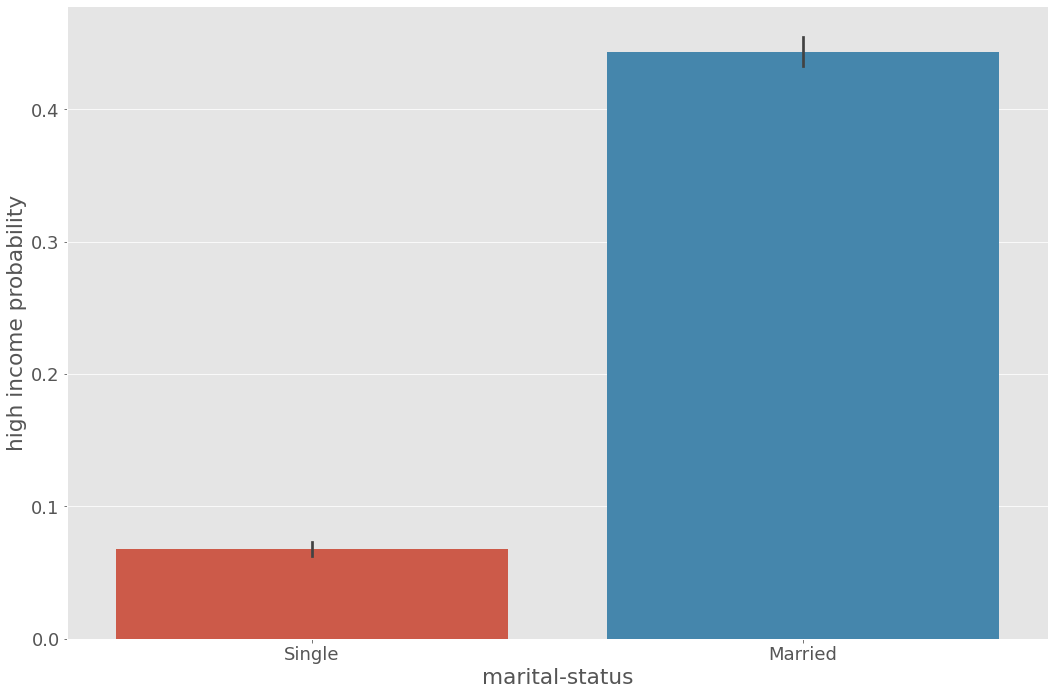

In [20]:
sns.factorplot(x='marital-status', y="high-income", data=df, kind='bar', size=10, aspect=1.5)
plt.ylabel('high income probability')

結婚したら所得が増えるのではなく、所得が多く安定出来るようになったから結婚すると考えられます。  
データ分析をする際には、原因と結果がどちらかを考察する必要があります。
## 性別

Text(3.9399999999999977, 0.5, 'high income probability')

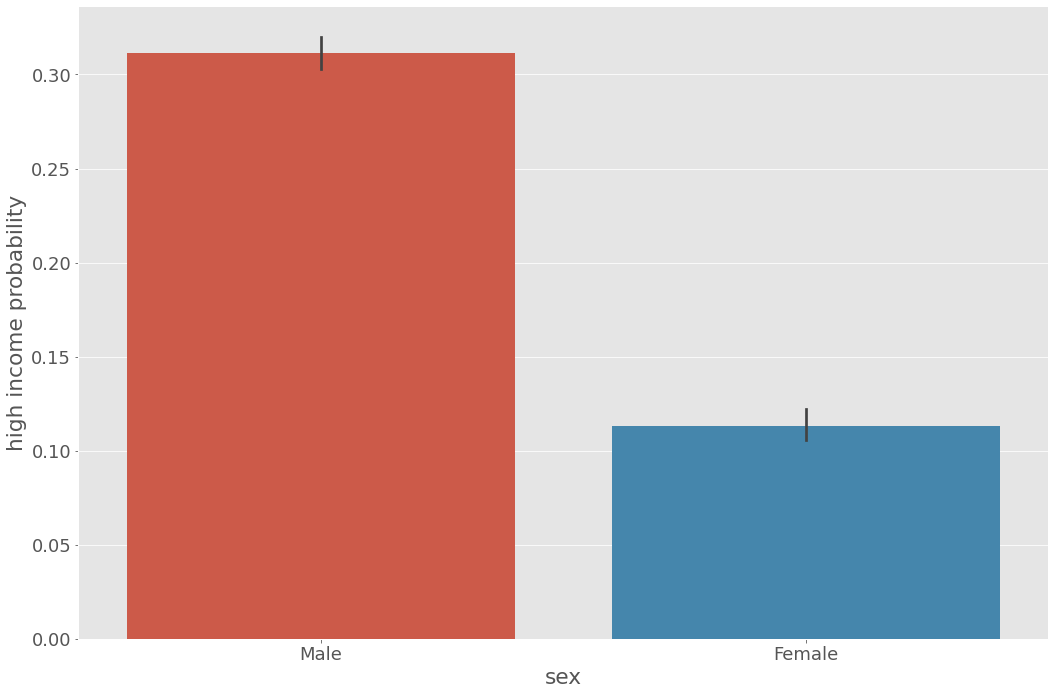

In [17]:
sns.factorplot(x='sex', y="high-income", data=df, kind='bar', size=10, aspect=1.5)
plt.ylabel('high income probability')

## 人種

Text(3.9399999999999977, 0.5, 'high income probability')

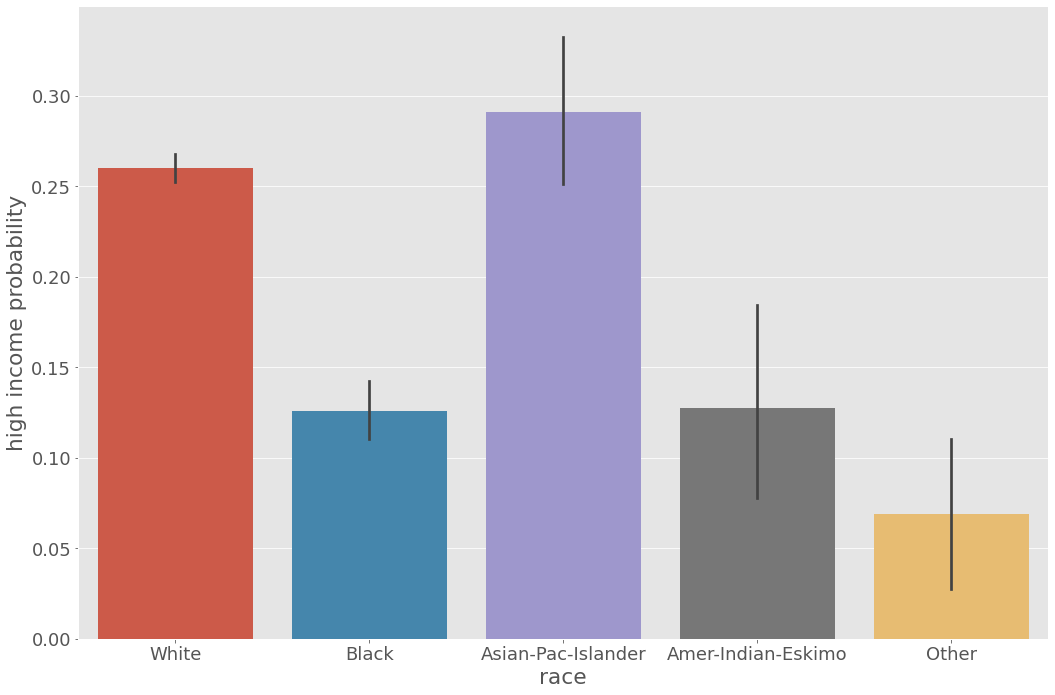

In [18]:
sns.factorplot(x='race', y="high-income", data=df, kind='bar', size=10, aspect=1.5)
plt.ylabel('high income probability')

## 演習課題
データからどんな事が所得格差の問題となっているか調査し、その問題を是正する政策を立案してください
- A4レポート一枚